# Weather Prediction Model Based On DataSet

## About Dataset :-

## Dataset Overview :-
This dataset contains  data collected from various dates, with the aim of predicting weather in advance. It includes a variety of weathers readings.

 ## Columns Description  :-
- #####  Date: The date of the weather observation in YYYY-MM-DD format.
- #####  City: The name of the city in India
- #####  Temperature (°C): The temperature in Celsius.
- #####  Humidity (%): The relative humidity percentage.
- #####  Pressure (hPa): Atmospheric pressure in hectopascals (hPa).
- #####  Wind Speed (km/h): Wind speed in kilometers per hour.
- #####  Rainfall (mm): Amount of rainfall in millimeters.
- #####  Weather Condition: General weather condition (e.g., Clear, Cloudy, Rain, Thunderstorms, etc.).


In [5]:
import pandas as pd
import pickle
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [6]:
# Suppress warnings to avoid cluttering the output
warnings.filterwarnings('ignore')

In [7]:
# Loading the Dataset
data = pd.read_csv('india_weather_data.csv')

In [8]:
# Displaying the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
         Date       City  Temperature (°C)  Humidity (%)  Pressure (hPa)  \
0  2024-12-22    Chennai              24.1            81            1013   
1  2024-12-13  Ahmedabad              32.6            55            1005   
2  2024-12-01  Hyderabad              26.6            59            1024   
3  2024-12-26  Hyderabad              25.6            79            1016   
4  2024-12-03  Hyderabad              31.8            82            1012   

   Wind Speed (km/h)  Rainfall (mm) Weather Condition  
0                 20           11.3     Thunderstorms  
1                 15           11.1     Partly Cloudy  
2                 12            6.3             Clear  
3                 13            3.2     Partly Cloudy  
4                  9            2.6              Rain  


In [9]:
# Displaying the last few rows of the dataset
print("\nLast few rows of the dataset:")
print(data.tail())


Last few rows of the dataset:
           Date       City  Temperature (°C)  Humidity (%)  Pressure (hPa)  \
995  2024-12-26      Kochi              22.7            64            1022   
996  2024-12-05     Jaipur              25.0            68            1014   
997  2024-12-15    Chennai              27.6            86            1018   
998  2024-12-05     Jaipur              28.9            86            1005   
999  2024-11-30  Ahmedabad              21.4            58            1022   

     Wind Speed (km/h)  Rainfall (mm) Weather Condition  
995                 18           13.6              Rain  
996                  5           12.8            Cloudy  
997                  9            1.2             Clear  
998                 16            1.7     Thunderstorms  
999                  7            3.1        Heavy Rain  


# Exploratory Data Analysis(EDA) :- 

In [11]:
# Displaying statistical summary of numerical columns
print("\nStatistical summary of numerical columns:")
print(data.describe())


Statistical summary of numerical columns:
       Temperature (°C)  Humidity (%)  Pressure (hPa)  Wind Speed (km/h)  \
count        1000.00000   1000.000000     1000.000000        1000.000000   
mean           27.39400     69.893000     1015.043000          12.181000   
std             4.31335     11.863486        5.914231           4.615793   
min            20.00000     50.000000     1005.000000           5.000000   
25%            23.70000     60.000000     1010.000000           8.000000   
50%            27.30000     70.000000     1015.000000          12.000000   
75%            31.10000     80.000000     1020.000000          16.000000   
max            35.00000     90.000000     1025.000000          20.000000   

       Rainfall (mm)  
count    1000.000000  
mean        7.474900  
std         4.237152  
min         0.000000  
25%         4.000000  
50%         7.400000  
75%        11.100000  
max        15.000000  


In [12]:
# Visualizing the distribution of key features (Temperature, Humidity, Rainfall)
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

Text(0.5, 1.0, 'Temperature Distribution')

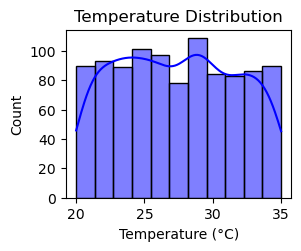

In [13]:
# Temperature Distribution
plt.subplot(2, 2, 1)
sns.histplot(data['Temperature (°C)'], kde=True, color='blue')
plt.title('Temperature Distribution')

Text(0.5, 1.0, 'Humidity Distribution')

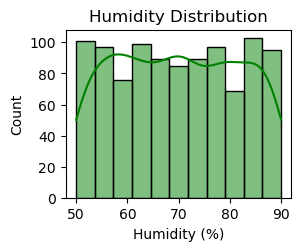

In [14]:
# Humidity Distribution
plt.subplot(2, 2, 2)
sns.histplot(data['Humidity (%)'], kde=True, color='green')
plt.title('Humidity Distribution')

Text(0.5, 1.0, 'Rainfall Distribution')

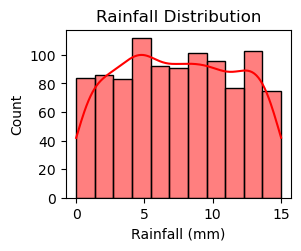

In [15]:
# Rainfall Distribution
plt.subplot(2, 2, 3)
sns.histplot(data['Rainfall (mm)'], kde=True, color='red')
plt.title('Rainfall Distribution')

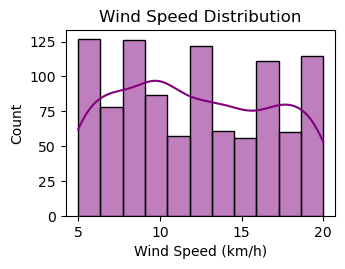

In [16]:
# Wind Speed Distribution
plt.subplot(2, 2, 4)
sns.histplot(data['Wind Speed (km/h)'], kde=True, color='purple')
plt.title('Wind Speed Distribution')

plt.tight_layout()
plt.show()

In [17]:
# Encode the target variable (Weather Condition) - we use 'Rainfall (mm)' for prediction
label_encoder = LabelEncoder()
data['Weather Condition'] = label_encoder.fit_transform(data['Weather Condition'])

In [18]:
# Define features (X) and target (y)
X = data.drop(columns=['Weather Condition', 'City', 'Date'])  # Drop non-numeric columns
y = data['Weather Condition']  # This is our target

In [19]:
# Splitting the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
# Normalizing the numeric features
scaler = StandardScaler()

In [21]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training and Evaluation :-

In [23]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
}

In [24]:
# Evaluate models
model_results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    model_results[name] = {'MAE': mae, 'R2': r2}
    print(f"{name} - MAE: {mae}, R2: {r2}")

Linear Regression - MAE: 1.4770377652026028, R2: -0.02100153488394163
Decision Tree - MAE: 1.89, R2: -1.0121257153697791
Random Forest - MAE: 1.5006333333333333, R2: -0.11347894994782948


In [25]:
# Find the best model
best_model_name = min(model_results, key=lambda k: model_results[k]['MAE'])  # Model with lowest MAE
best_model = models[best_model_name]

In [26]:
print(f"\nBest model: {best_model_name}")


Best model: Linear Regression


In [27]:
# Save the best model, scaler, and label encoder
with open('best_weather_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('weather_label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

In [28]:
print("Best model, scaler, and label encoder saved.")

Best model, scaler, and label encoder saved.


In [29]:
# Visualize model performance: MAE and R² for each model
model_names = list(model_results.keys())
mae_values = [model_results[name]['MAE'] for name in model_names]
r2_values = [model_results[name]['R2'] for name in model_names]

plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

Text(0, 0.5, 'MAE')

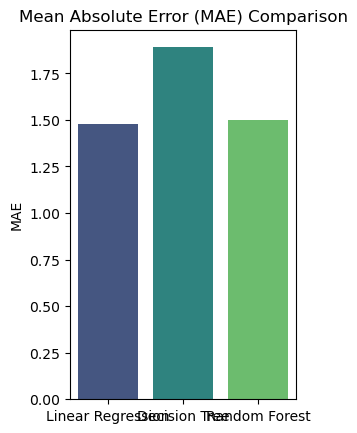

In [30]:
# Plotting MAE values
plt.subplot(1, 2, 1)
sns.barplot(x=model_names, y=mae_values, palette='viridis')
plt.title('Mean Absolute Error (MAE) Comparison')
plt.ylabel('MAE')

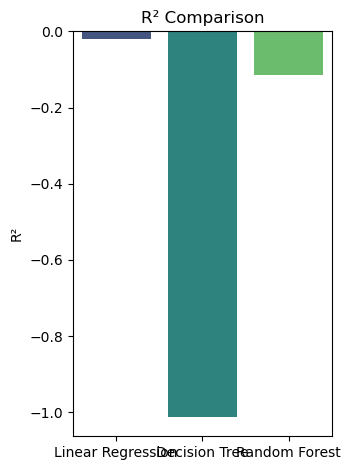

In [31]:
# Plotting R² values
plt.subplot(1, 2, 2)
sns.barplot(x=model_names, y=r2_values, palette='viridis')
plt.title('R² Comparison')
plt.ylabel('R²')

plt.tight_layout()
plt.show()